<a href="https://colab.research.google.com/github/jumbokh/Computer-Vision/blob/main/notebooks/tunnel_wall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 實作 opencv 辨識牆壁上裂痕

In [6]:
!wget https://github.com/jumbokh/Computer-Vision/blob/main/images/IMG_20230922_221158.jpg -O wall.jpg

--2023-09-24 06:46:00--  https://github.com/jumbokh/Computer-Vision/blob/main/images/IMG_20230922_221158.jpg
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4967 (4.9K) [text/plain]
Saving to: ‘wall.jpg’

wall.jpg            100%[===================>]   4.85K  --.-KB/s    in 0s      

2023-09-24 06:46:00 (30.0 MB/s) - ‘wall.jpg’ saved [4967/4967]



In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from google.colab import files
uploaded = files.upload()

Saving IMG_20230922_221158.jpg to IMG_20230922_221158 (1).jpg


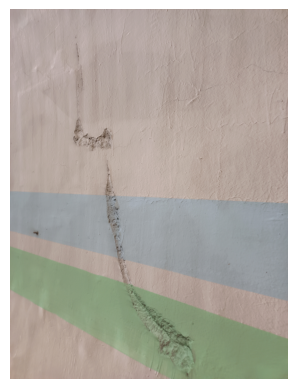

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('IMG_20230922_221158 (1).jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

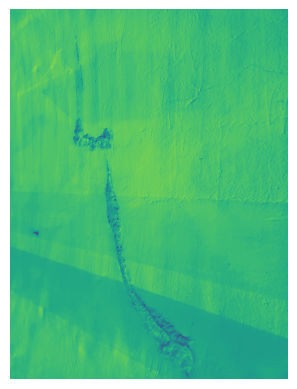

In [18]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [19]:
import argparse

In [20]:
hist = cv2.calcHist([image], [0], None, [256], [0, 256])  # ←計算直方圖資訊

(0.0, 256.0)

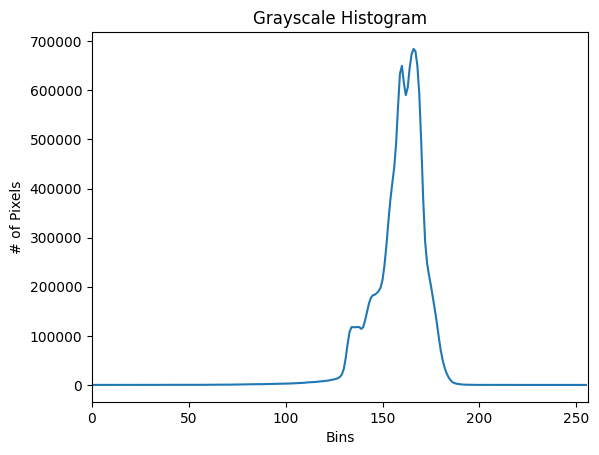

In [21]:
#使用MatPlot繪出 histogram

plt.figure()

plt.title("Grayscale Histogram")

plt.xlabel("Bins")

plt.ylabel("# of Pixels")

plt.plot(hist)

plt.xlim([0, 256])

In [23]:
ret, output1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
output2 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
output3 = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

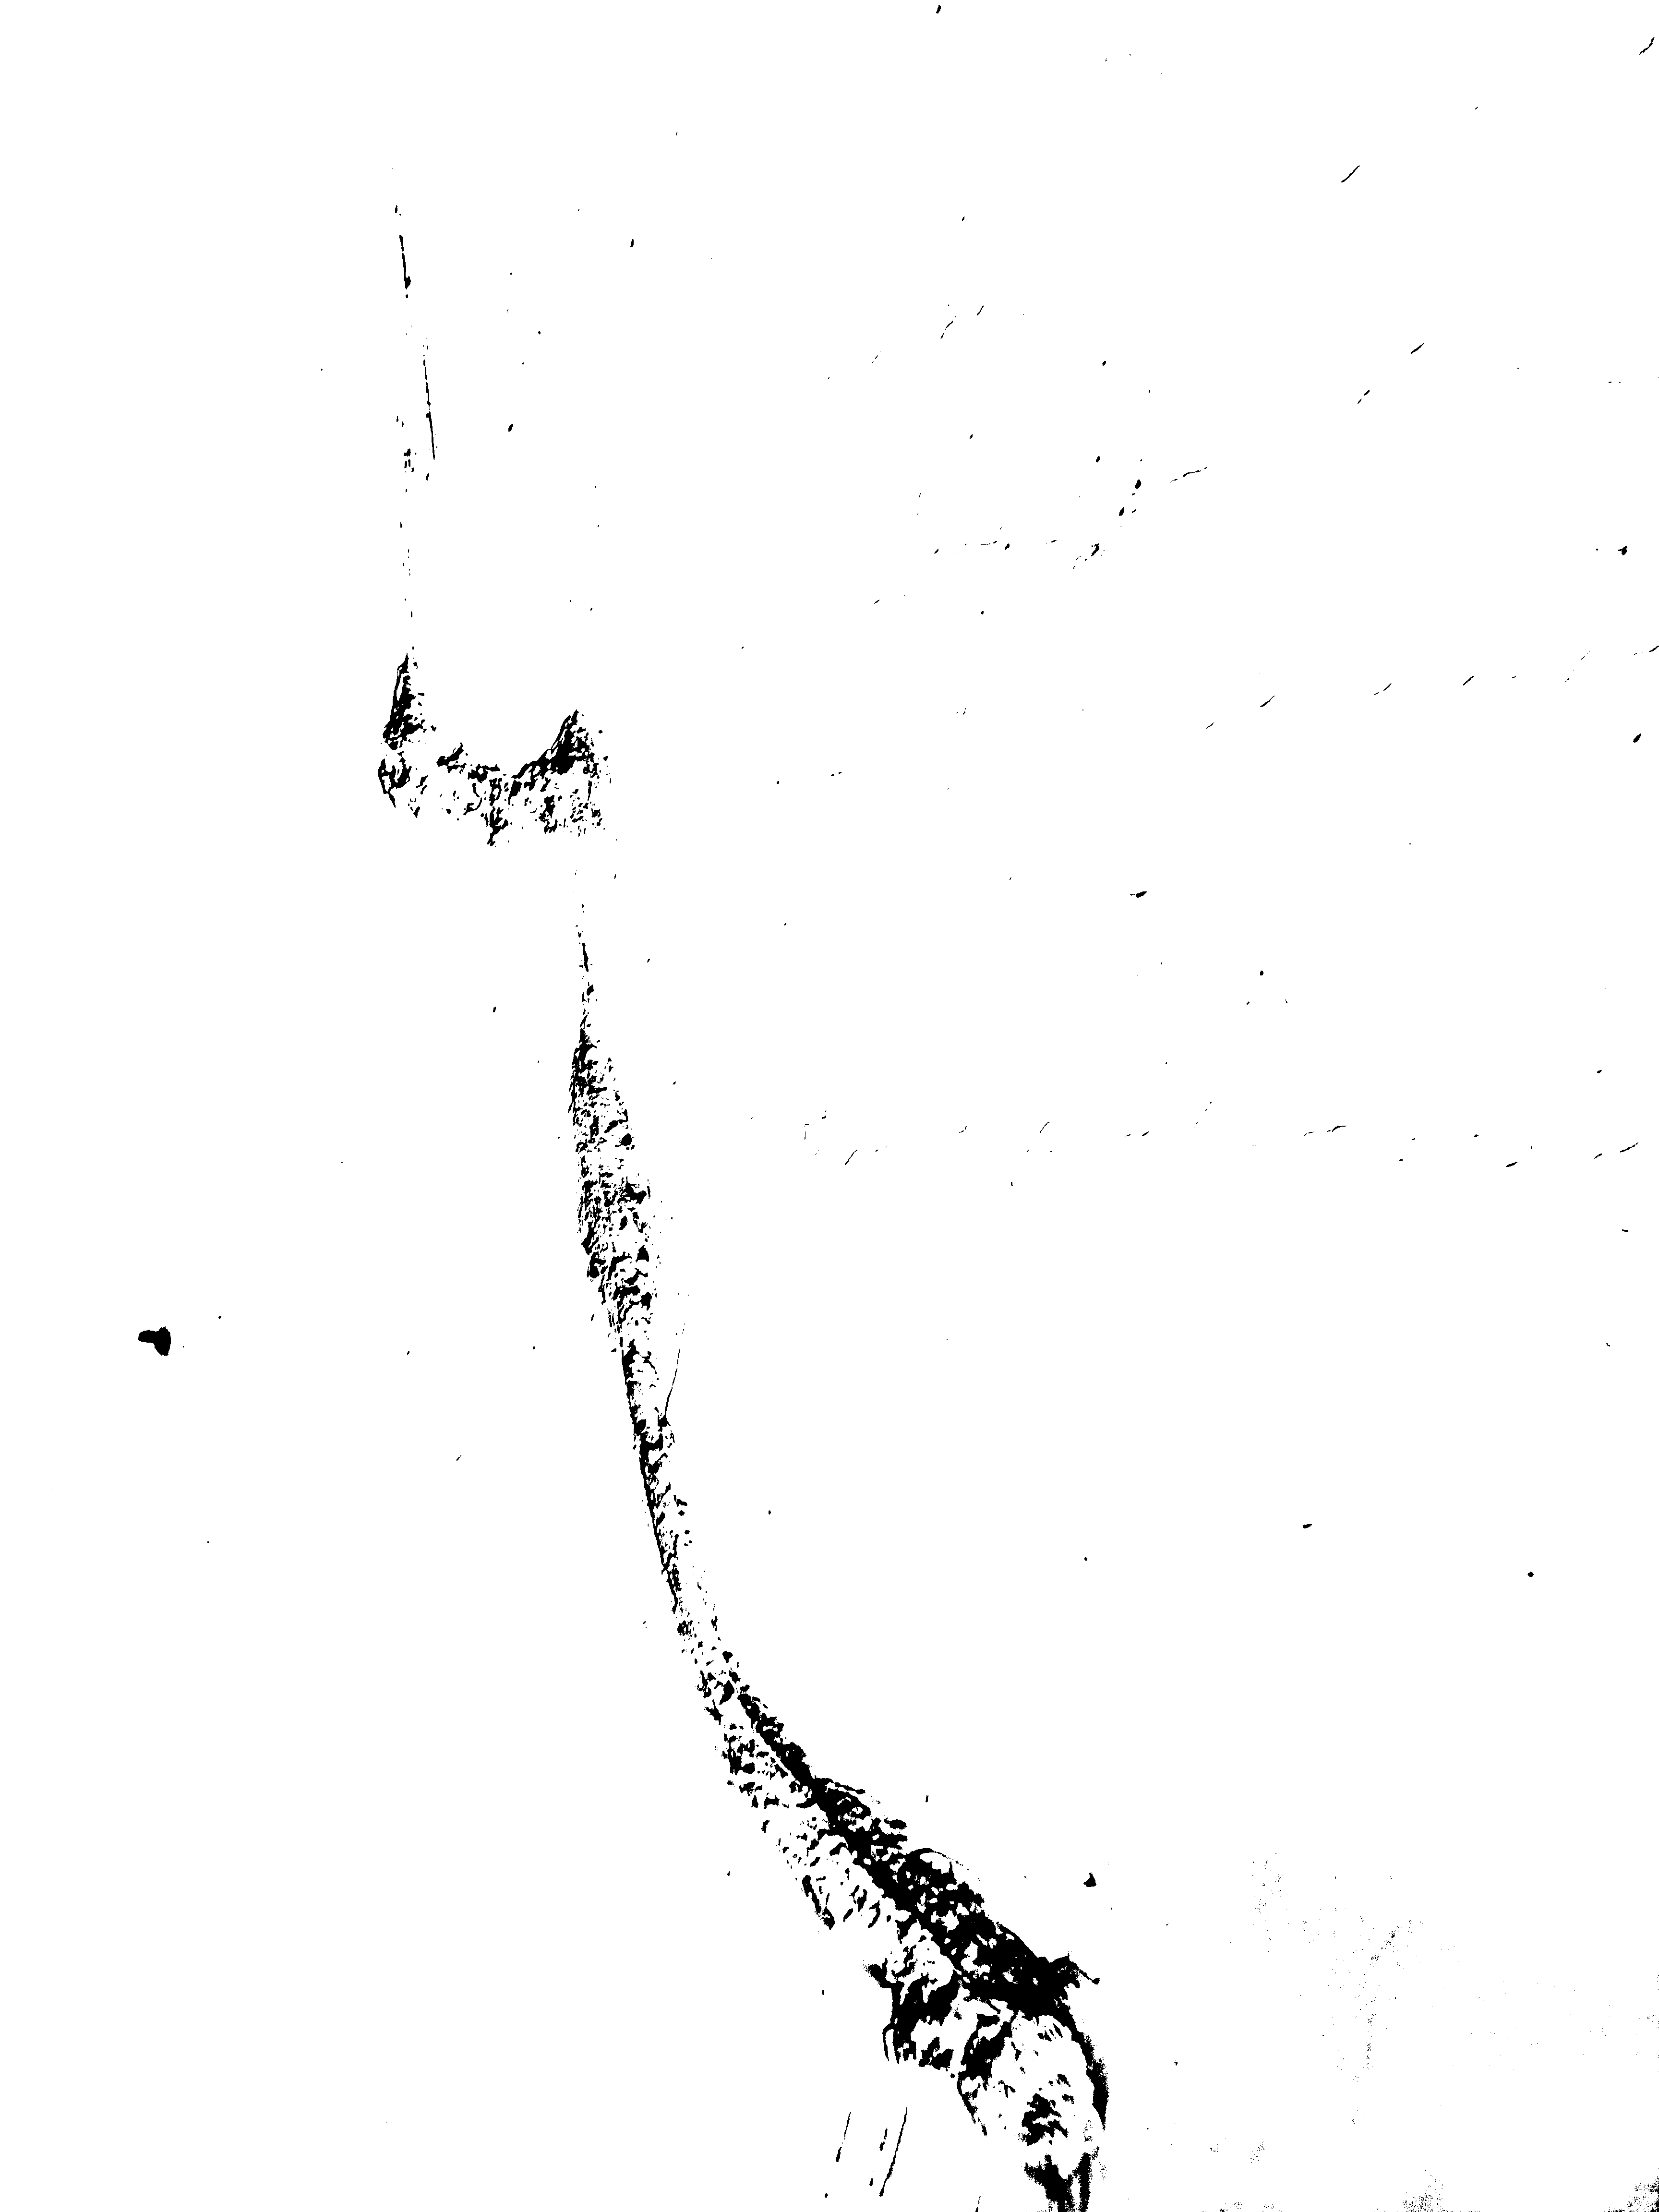

In [24]:
from google.colab.patches import cv2_imshow
cv2_imshow(output1)

In [ ]:
cv2_imshow(output2)

In [ ]:
cv2_imshow(output3)

In [31]:
kernel_size = 3
blur_gray = cv2.GaussianBlur(output1,(kernel_size, kernel_size), 0)

In [32]:
low_threshold = 1
high_threshold = 10
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

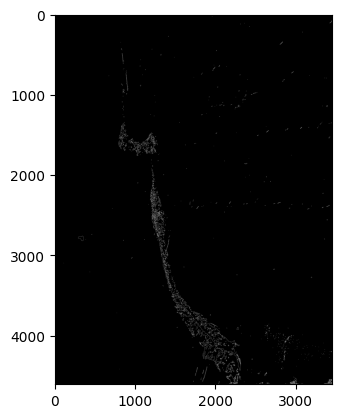

In [33]:
plt.imshow(edges, cmap='Greys_r')

In [36]:
contours, hierarchy = cv2.findContours(image,
            cv2.RETR_LIST,
            cv2.CHAIN_APPROX_SIMPLE)

In [37]:
mask = np.zeros(image.shape, np.uint8)

In [38]:
dst = cv2.drawContours(mask,contours, -1, (255,255,255),-1)
dst_result = cv2.bitwise_and(image,mask)

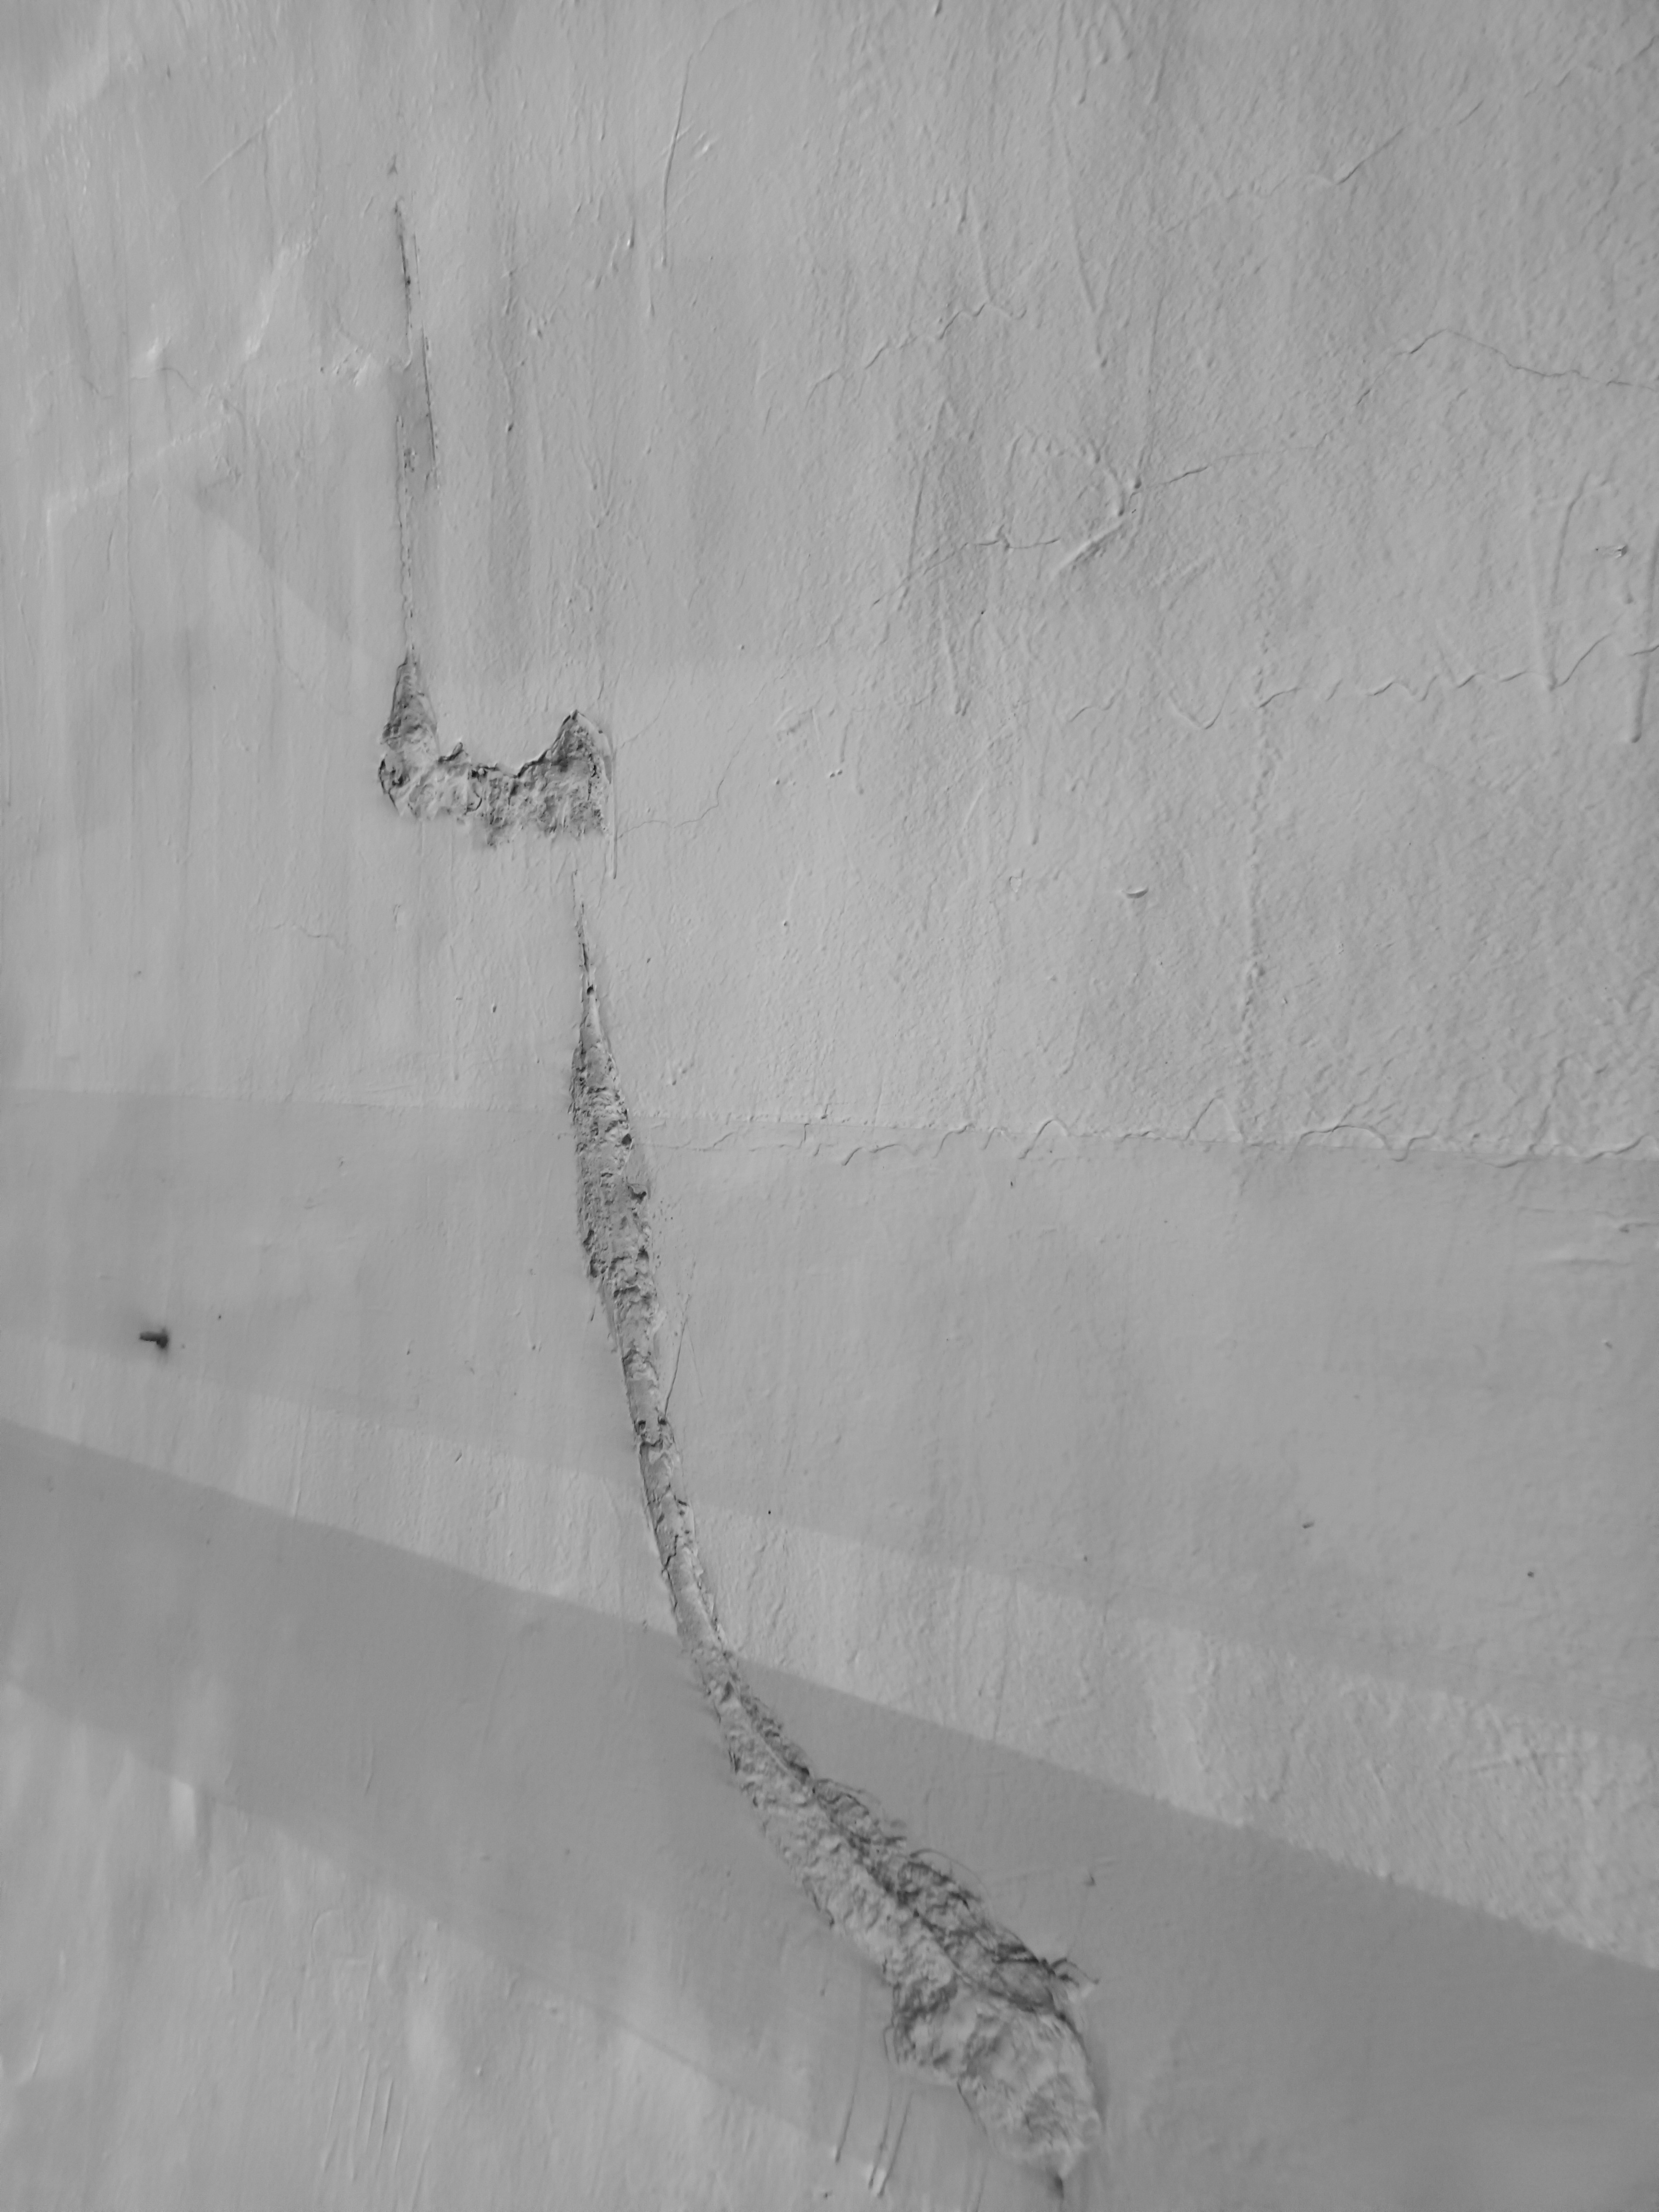

In [39]:
cv2_imshow(dst_result)